Assignment task - find the best test classification model for the sentimental analysis

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Define the text
lines = [
    'The sun sets over the quiet meadow.',
    'Birds chirp softly in the early morning.',
    'A gentle breeze rustles the autumn leaves.',
    'Stars twinkle brightly in the clear night sky.'
]

# Creat the CountVectorizer instance, the stop_words parameter is set to "english"
# to remove common English stop words like "and", "the", and "a"
vectorizer = CountVectorizer(stop_words='english')

# Convert the text to vectorizer
word_matrix = vectorizer.fit_transform(lines)

# The get_feature_names_out method is used to get the feature names 
# (i.e., the individual words) in the word matrix
feature_names = vectorizer.get_feature_names_out()

# The line_names list is created to store the names of each line in the original
# list of strings
line_names = [f'Line {(i + 1):d}' for i, _ in enumerate(word_matrix)]

# A Pandas DataFrame is created using the word_matrix.toarray() method to convert 
# the sparse matrix to a dense array
df = pd.DataFrame(data=word_matrix.toarray(), index=line_names,columns=feature_names)

# The head() method is called on the resulting DataFrame to display the first few 
# rows of the matrix
df.head()

,autumn,birds,breeze,brightly,chirp,clear,early,gentle,leaves,meadow,morning,night,quiet,rustles,sets,sky,softly,stars,sun,twinkle
Line 1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
Line 2,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
Line 3,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
Line 4,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1


Load the dataset:

In [2]:
import pandas as pd
import os

# The path of the dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'

# Load the data use the pandas
df = pd.read_csv(url)

# Display the data
df.head()

,Text,Sentiment
0,Adayala road is clear,0
1,Traffic jam from parbat rd to nazim-ud-din rd ...,1
2,Mandra is clear,0
3,Fort street is clear,0
4,"Mashriq Hotel towards Fawara Chowk, City Sadda...",1


Print a brief summary of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       2109 non-null   object
 1   Sentiment  2109 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.1+ KB


In [4]:
# Delete the duplicate rows
df = df.drop_duplicates()

# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1008   1008                              Adayala road is clear    1
1          1079   1079  Traffic jam from parbat rd to nazim-ud-din rd ...    1

Now there are no duplicate rows, and the number of positive and negative samples is roughly equal.

Next, use CountVectorizer to prepare and vectorize the text in the Text column:

In [5]:
# Convert the text to vectorizer
x = df['Text']

# Obtain the label
y = df['Sentiment']

split the dataset

In [6]:
from sklearn.model_selection import train_test_split

# Splite the train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the CountVectorizer instance, the ngram_range represents the length range 
# of phrase segmentation,the stop_words parameter is set to "english" to remove 
# common English stop words like "and", "the", and "a", min_df is to serve as a 
# threshold to delete some words which have a frequency lower then min_df.
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)

x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

Task 1 - Find the best vectorization method

1. CountVectorizer

The accuracy of the model is: 0.937799043062201
Classification Report:
              precision    recall  f1-score   support

    Positive       0.90      0.98      0.94       211
    Negative       0.98      0.89      0.93       207

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



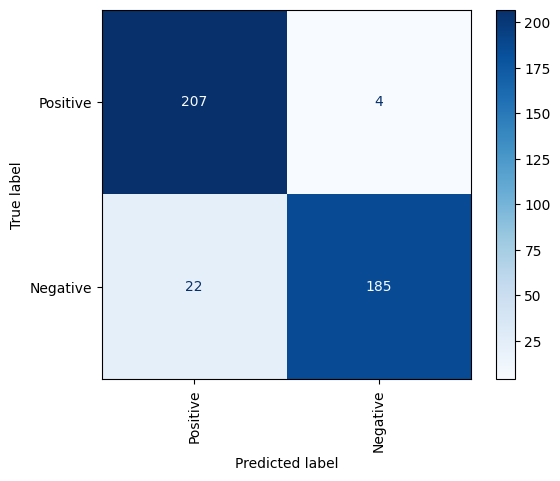

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import classification_report
import os

# here you can try use different vectorization methods (Attention! uncomment the
# method you want to test, and comment out the other methods)
#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

#(1) CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)

#(2) #HashingVectorizer
# vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=200)

#(3)TfidfVectorizer
# vectorizer = TfidfVectorizer(
#     min_df=20,
#     norm='l2',
#     smooth_idf=True,
#     use_idf=True,
#     ngram_range=(1, 2),
#     stop_words='english'
#     )

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train_vectorized, y_train)

y_pred = model.predict(x_test_vectorized)

cmd.from_estimator(
    model, 
    x_test_vectorized, 
    y_test, 
    display_labels=['Positive','Negative'], 
    cmap='Blues', 
    xticks_rotation='vertical'
    )

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test, y_pred)))


print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Positive', 'Negative']))

2. HashingVectorizer

The accuracy of the model is: 0.9545454545454546
Classification Report:
              precision    recall  f1-score   support

    Positive       0.94      0.97      0.96       211
    Negative       0.97      0.94      0.95       207

    accuracy                           0.95       418
   macro avg       0.96      0.95      0.95       418
weighted avg       0.96      0.95      0.95       418



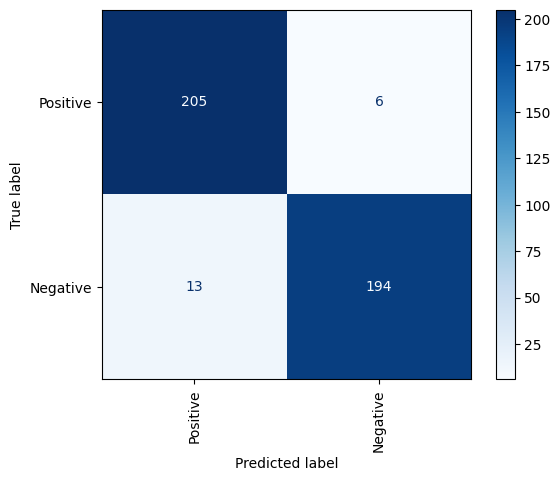

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import classification_report
import os

# here you can try use different vectorization methods (Attention! uncomment the
# method you want to test, and comment out the other methods)
#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

#(1) CountVectorizer
#vectorizer = CountVectorizer(ngram_range=(1, 2), #stop_words='english', min_df=20)

#(2) #HashingVectorizer
vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=200)

#(3)TfidfVectorizer
# vectorizer = TfidfVectorizer(
#     min_df=20,
#     norm='l2',
#     smooth_idf=True,
#     use_idf=True,
#     ngram_range=(1, 2),
#     stop_words='english'
#     )

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train_vectorized, y_train)

y_pred = model.predict(x_test_vectorized)

cmd.from_estimator(
    model, 
    x_test_vectorized, 
    y_test, 
    display_labels=['Positive','Negative'], 
    cmap='Blues', 
    xticks_rotation='vertical'
    )

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test, y_pred)))


print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Positive', 'Negative']))

3. TfidVectorizer

The accuracy of the model is: 0.9545454545454546
Classification Report:
              precision    recall  f1-score   support

    Positive       0.94      0.98      0.96       211
    Negative       0.97      0.93      0.95       207

    accuracy                           0.95       418
   macro avg       0.96      0.95      0.95       418
weighted avg       0.96      0.95      0.95       418



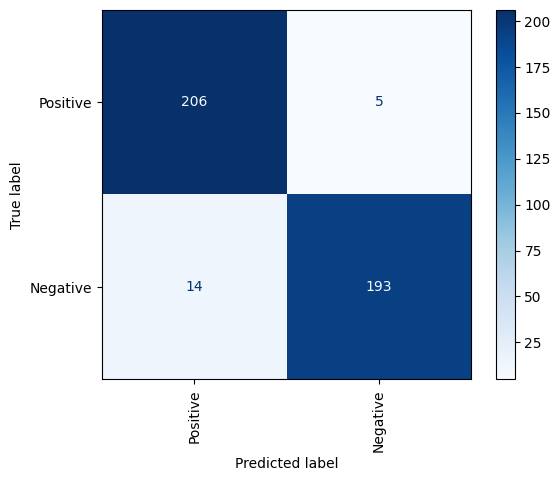

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import classification_report
import os

# here you can try use different vectorization methods (Attention! uncomment the
# method you want to test, and comment out the other methods)
#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

#(1) CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)

#(2) #HashingVectorizer
# vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=200)

#(3)TfidfVectorizer
vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 2),
    stop_words='english'
    )

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train_vectorized, y_train)

y_pred = model.predict(x_test_vectorized)

cmd.from_estimator(
    model, 
    x_test_vectorized, 
    y_test, 
    display_labels=['Positive','Negative'], 
    cmap='Blues', 
    xticks_rotation='vertical'
    )

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test, y_pred)))


print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Positive', 'Negative']))

Task 2 - Explore the performance of different text classification models

Logistic Regression

Best Parameters: {'C': 0.1}
The accuracy of the model is: 0.9521531100478469


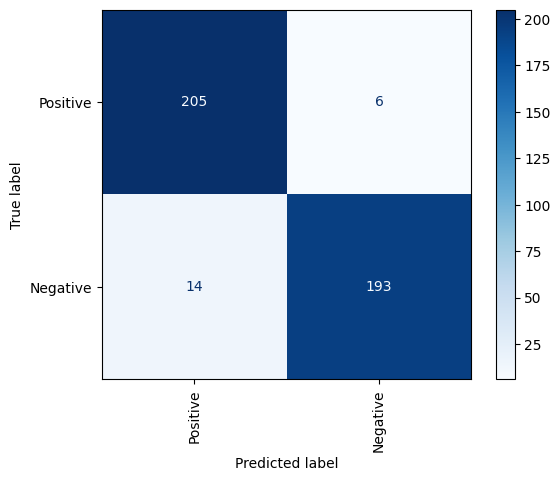

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os

vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
    )

# split into train/test set
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)




# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# here you can try use different models (Attention! uncomment the method you want
# to test, and comment out the other methods)


#-*-*-*-*-*-*chose different models-*-*-*-*-*-*

#(1)LR
model = LogisticRegression(max_iter=1000, random_state=0)

#(2)KNN
# model=KNeighborsClassifier()

#(3)RF
# model = RandomForestClassifier(random_state=0)

#(4)XGBoost
# model =  XGBClassifier()

#(5)SVM
# model= SVC(kernel="linear")

#(6)Naïve Bayes models
# model=BernoulliNB()
#-*-*-*-*-*-*chose different models-*-*-*-*-*-*

#gridsearch
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_vectorized, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

model.fit(x_train_vectorized, y_train)
cmd.from_estimator(
    model, 
    x_test_vectorized, 
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues', 
    xticks_rotation='vertical'
    )

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))

KNN

Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}
The accuracy of the model is: 0.9090909090909091


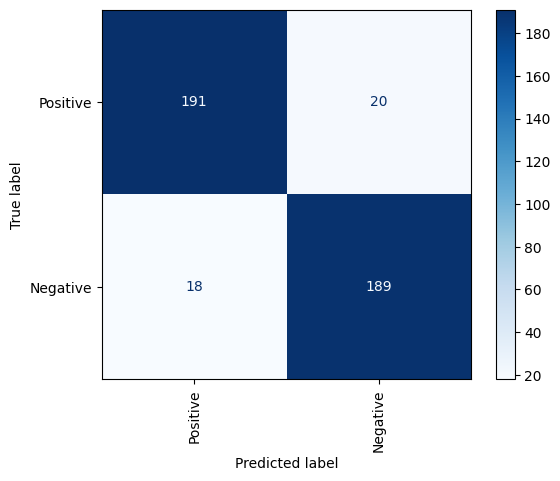

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os

vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
    )

# split into train/test set
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)




# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# here you can try use different models (Attention! uncomment the method you want
# to test, and comment out the other methods)


#-*-*-*-*-*-*chose different models-*-*-*-*-*-*

#(1)LR
#model = LogisticRegression(max_iter=1000, random_state=0)

#(2)KNN
model=KNeighborsClassifier()

#(3)RF
# model = RandomForestClassifier(random_state=0)

#(4)XGBoost
# model =  XGBClassifier()

#(5)SVM
# model= SVC(kernel="linear")

#(6)Naïve Bayes models
# model=BernoulliNB()
#-*-*-*-*-*-*chose different models-*-*-*-*-*-*

#gridsearch
param_grid = {
    'n_neighbors': [2, 3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_vectorized, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

model = grid_search.best_estimator_
cmd.from_estimator(
    model, 
    x_test_vectorized, 
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues', 
    xticks_rotation='vertical'
    )

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))

RF

Best Parameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
The accuracy of the model is: 0.9569377990430622


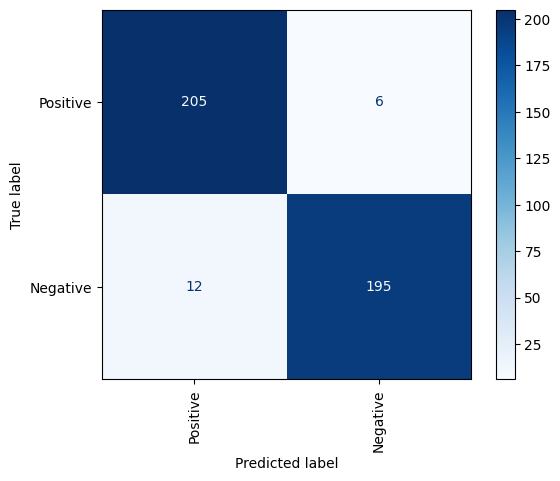

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os

vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
    )

# split into train/test set
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# here you can try use different models (Attention! uncomment the method you want
# to test, and comment out the other methods)


#-*-*-*-*-*-*chose different models-*-*-*-*-*-*

#(1)LR
#model = LogisticRegression(max_iter=1000, random_state=0)

#(2)KNN
#model=KNeighborsClassifier()

#(3)RF
model = RandomForestClassifier(random_state=0)

#(4)XGBoost
# model =  XGBClassifier()

#(5)SVM
# model= SVC(kernel="linear")

#(6)Naïve Bayes models
# model=BernoulliNB()
#-*-*-*-*-*-*chose different models-*-*-*-*-*-*

#gridsearch
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_vectorized, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

model = grid_search.best_estimator_
cmd.from_estimator(
    model, 
    x_test_vectorized, 
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues', 
    xticks_rotation='vertical'
    )

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))

XGBoost

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
The accuracy of the model is: 0.9712918660287081


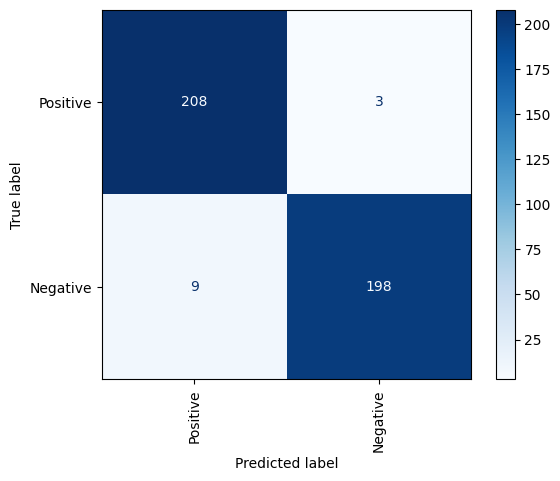

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os

vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
    )

# split into train/test set
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# here you can try use different models (Attention! uncomment the method you want
# to test, and comment out the other methods)


#-*-*-*-*-*-*chose different models-*-*-*-*-*-*

#(1)LR
#model = LogisticRegression(max_iter=1000, random_state=0)

#(2)KNN
#model=KNeighborsClassifier()

#(3)RF
#model = RandomForestClassifier(random_state=0)

#(4)XGBoost
model =  XGBClassifier()

#(5)SVM
# model= SVC(kernel="linear")

#(6)Naïve Bayes models
# model=BernoulliNB()
#-*-*-*-*-*-*chose different models-*-*-*-*-*-*

#gridsearch
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_vectorized, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

model = grid_search.best_estimator_
cmd.from_estimator(
    model, 
    x_test_vectorized, 
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues', 
    xticks_rotation='vertical'
    )

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))

SVM

Best Parameters: {'C': 0.1, 'kernel': 'rbf'}
The accuracy of the model is: 0.9593301435406698


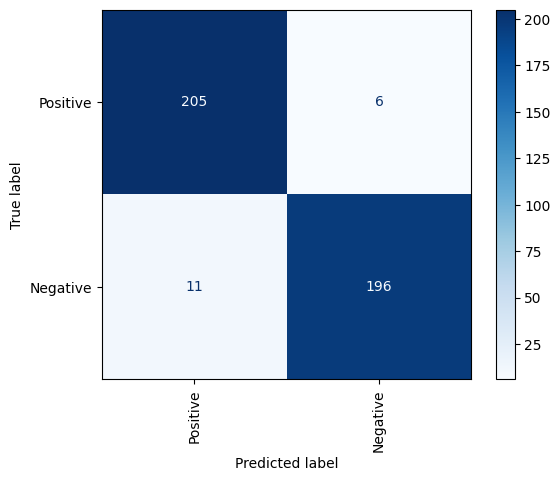

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os

vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
    )

# split into train/test set
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# here you can try use different models (Attention! uncomment the method you want
# to test, and comment out the other methods)


#-*-*-*-*-*-*chose different models-*-*-*-*-*-*

#(1)LR
#model = LogisticRegression(max_iter=1000, random_state=0)

#(2)KNN
#model=KNeighborsClassifier()

#(3)RF
#model = RandomForestClassifier(random_state=0)

#(4)XGBoost
#model =  XGBClassifier()

#(5)SVM
model= SVC(kernel="linear")

#(6)Naïve Bayes models
# model=BernoulliNB()
#-*-*-*-*-*-*chose different models-*-*-*-*-*-*

#gridsearch
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_vectorized, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

model = grid_search.best_estimator_
cmd.from_estimator(
    model, 
    x_test_vectorized, 
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues', 
    xticks_rotation='vertical'
    )

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))

Naive Bayes

Best Parameters: {'alpha': 1.0}
The accuracy of the model is: 0.9401913875598086


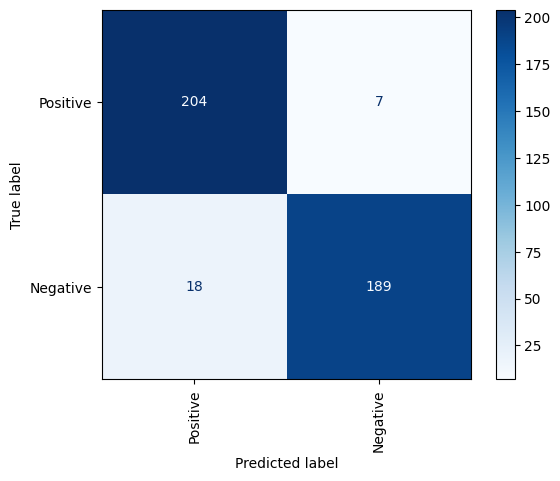

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os

vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
    )

# split into train/test set
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# here you can try use different models (Attention! uncomment the method you want
# to test, and comment out the other methods)


#-*-*-*-*-*-*chose different models-*-*-*-*-*-*

#(1)LR
#model = LogisticRegression(max_iter=1000, random_state=0)

#(2)KNN
#model=KNeighborsClassifier()

#(3)RF
#model = RandomForestClassifier(random_state=0)

#(4)XGBoost
#model =  XGBClassifier()

#(5)SVM
#model= SVC(kernel="linear")

#(6)Naïve Bayes models
model=BernoulliNB()
#-*-*-*-*-*-*chose different models-*-*-*-*-*-*

#gridsearch
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_vectorized, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

model = grid_search.best_estimator_
cmd.from_estimator(
    model, 
    x_test_vectorized, 
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues', 
    xticks_rotation='vertical'
    )

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))